In [ ]:
# Import necessary libraries for linear algebra, data processing, and visualization
import numpy as np  # for linear algebra
import pandas as pd  # for data processing and CSV file I/O
import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns  # for enhanced data visualization

# If working in a Jupyter Notebook, this ensures that plots are displayed inline
%matplotlib inline


In [ ]:
# Load the dataset from the provided URL
df = pd.read_csv('https://raw.githubusercontent.com/nrkfeller/machinelearningnotes/master/breast-cancer-wisconsin.data.txt')

# Display the first few rows of the dataset to understand its structure
df.head()


,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
# Define column names for the dataset
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape',
             'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei',
             'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

# Assign new column names to the dataframe
df.columns = col_names

# Display updated column names
df.columns


Index(['Id', 'Clump_thickness', 'Uniformity_Cell_Size',
       'Uniformity_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [ ]:
# Drop the 'Id' column as it is not required for analysis
df.drop('Id', axis=1, inplace=True)

# Check the summary of the dataset to see data types and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              699 non-null    int64 
 1   Uniformity_Cell_Size         699 non-null    int64 
 2   Uniformity_Cell_Shape        699 non-null    int64 
 3   Marginal_Adhesion            699 non-null    int64 
 4   Single_Epithelial_Cell_Size  699 non-null    int64 
 5   Bare_Nuclei                  699 non-null    object
 6   Bland_Chromatin              699 non-null    int64 
 7   Normal_Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [ ]:
# Convert 'Bare_Nuclei' column to numeric, coercing invalid values into NaN
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')

# Check for missing values
df.isnull().sum()


,0
Clump_thickness,0
Uniformity_Cell_Size,0
Uniformity_Cell_Shape,0
Marginal_Adhesion,0
Single_Epithelial_Cell_Size,0
Bare_Nuclei,16
Bland_Chromatin,0
Normal_Nucleoli,0
Mitoses,0
Class,0


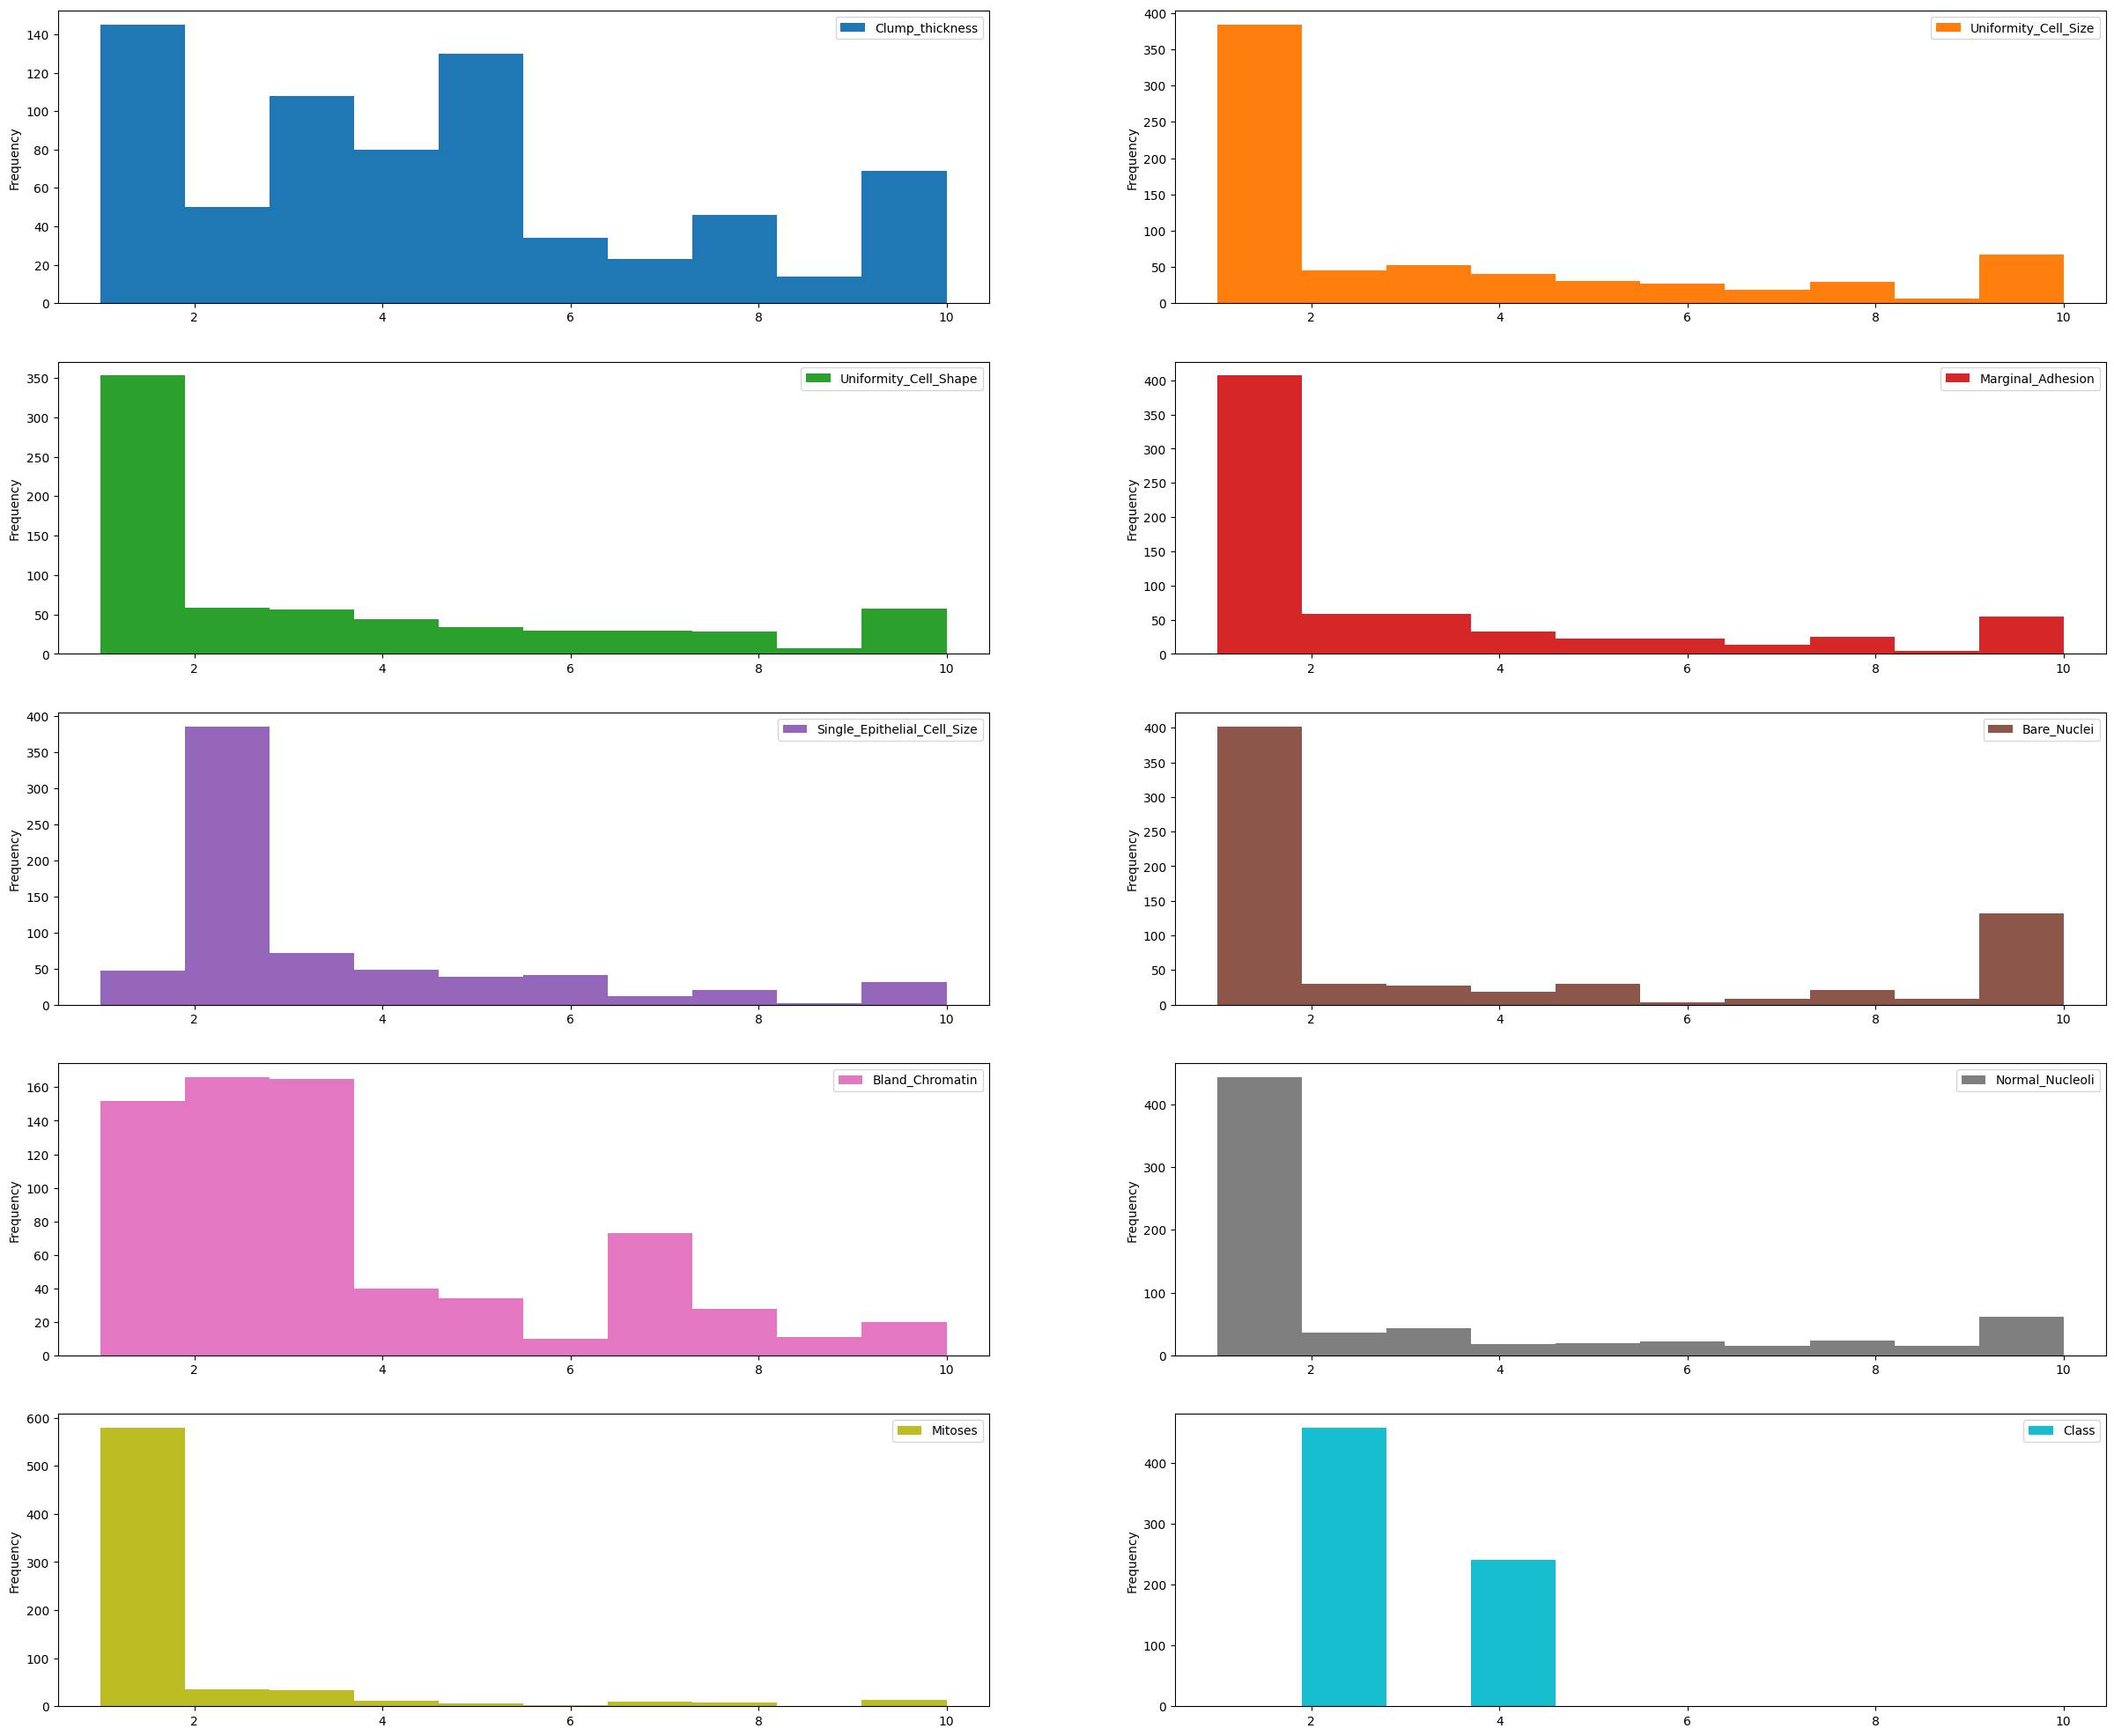

In [ ]:
# Plot histograms for all numerical variables to observe the distribution
plt.rcParams['figure.figsize'] = (30, 25)
df.plot(kind='hist', bins=10, subplots=True, layout=(5, 2), sharex=False, sharey=False)
plt.show()


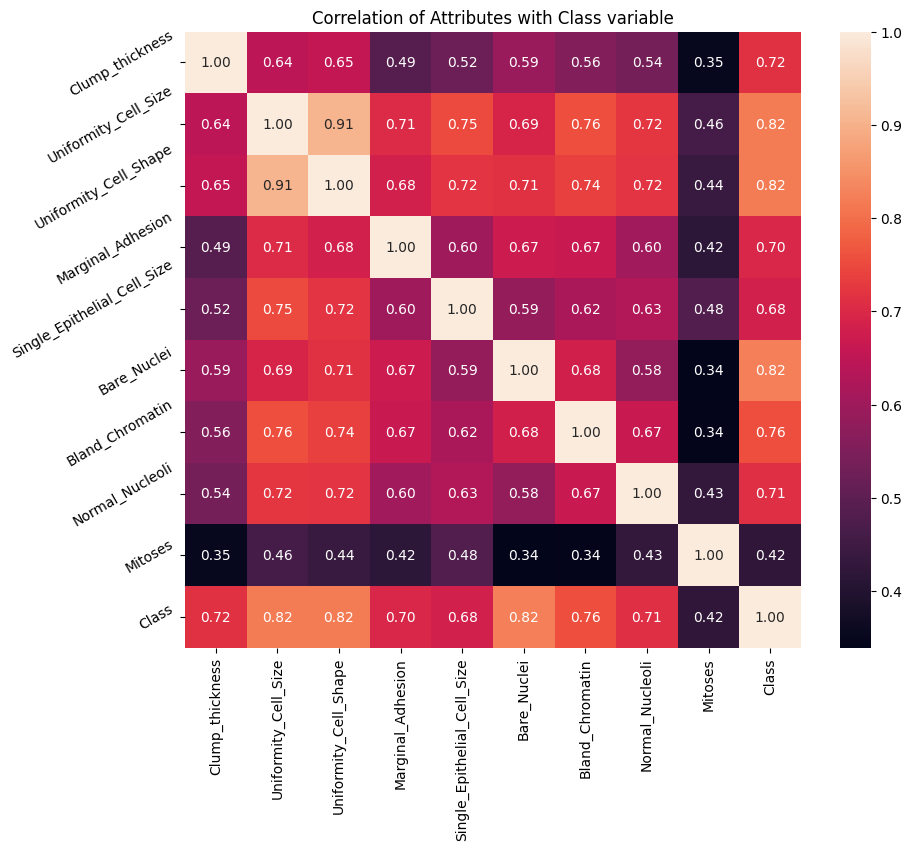

In [ ]:
# Calculate the correlation matrix
correlation = df.corr()

# Plot a heatmap to visualize correlations between variables
plt.figure(figsize=(10, 8))
plt.title('Correlation of Attributes with Class variable')
sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')

# Rotate the labels on x and y axes for better readability
plt.xticks(rotation=90)
plt.yticks(rotation=30)
plt.show()


In [ ]:
# Separate features (X) and target variable (y)
X = df.drop(['Class'], axis=1)
y = df['Class']


In [ ]:
# Impute missing values in 'Bare_Nuclei' using the median of the column
for col in X.columns:
    if X[col].isnull().mean() > 0:
        col_median = X[col].median()
        X[col].fillna(col_median, inplace=True)


<ipython-input-21-58498835cec8>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(col_median, inplace=True)


In [ ]:
# Standardize the features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert the standardized data back into a DataFrame
X = pd.DataFrame(X, columns=df.drop(['Class'], axis=1).columns)


In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
# Import the KNeighborsClassifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the KNN model with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training set
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Make predictions on the test set
y_pred = knn.predict(X_test)
print(y_pred)

# Calculate and print the accuracy of the model
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

# Check accuracy on the training set
y_pred_train = knn.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'.format(accuracy_score(y_train, y_pred_train)))


[2 2 4 2 4 2 4 2 4 2 2 2 4 4 4 2 2 4 4 2 4 4 2 2 2 4 2 2 4 4 2 2 2 2 2 2 2
 4 2 2 2 2 2 2 4 4 2 4 2 4 4 2 2 4 2 2 2 2 2 2 4 2 2 4 4 4 4 2 2 4 2 2 4 4
 2 2 2 2 4 2 2 2 4 2 2 2 4 2 4 4 2 2 2 4 2 2 2 4 2 4 4 2 2 2 4 2 2 2 2 2 4
 4 4 2 2 2 2 2 4 4 4 4 2 4 2 2 4 4 4 4 4 2 2 4 4 2 2 4 2 2]
Model accuracy score: 0.9714
Training-set accuracy score: 0.9821


In [ ]:
# check class distribution in test set
y_test.value_counts()

,count
Class,
2,85
4,55


In [ ]:
# check null accuracy score
null_accuracy = (85/(85+55))
print('Null accuracy score: {0:0.4f}'.format(null_accuracy))

Null accuracy score: 0.6071


In [ ]:
# Generate a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix and its components
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0, 0])
print('\nTrue Negatives(TN) = ', cm[1, 1])
print('\nFalse Positives(FP) = ', cm[0, 1])
print('\nFalse Negatives(FN) = ', cm[1, 0])


Confusion matrix

 [[83  2]
 [ 2 53]]

True Positives(TP) =  83

True Negatives(TN) =  53

False Positives(FP) =  2

False Negatives(FN) =  2


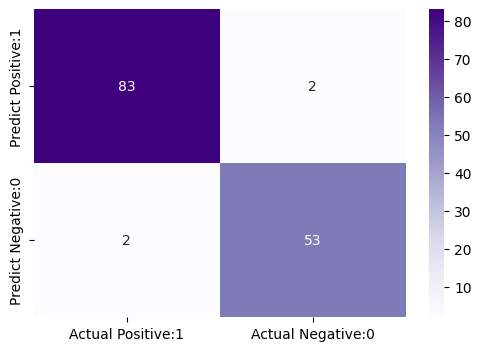

In [ ]:
# Create a DataFrame from the confusion matrix for easier plotting
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                         index=['Predict Positive:1', 'Predict Negative:0'])
plt.figure(figsize=(6,4))
# Visualize the confusion matrix using a heatmap
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Purples')
plt.show()


In [ ]:
# Load the dataset from the provided URL
df = pd.read_csv('https://raw.githubusercontent.com/chingisooinar/KNN-python-implementation/refs/heads/main/Social_Network_Ads.csv')

# Display the first few rows of the dataset to understand its structure
df.head(10)


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


In [ ]:
df.dtypes

,0
Age,int64
EstimatedSalary,int64
Purchased,int64


In [ ]:
# Define column names for the dataset
col_names = ['Age','EstimatedSalary','Purchased']

# Assign new column names to the dataframe
df.columns = col_names

# Display updated column names
df.columns


Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [ ]:
# Check the summary of the dataset to see data types and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [ ]:
# Check for missing values
df.isnull().sum()


,0
Age,0
EstimatedSalary,0
Purchased,0


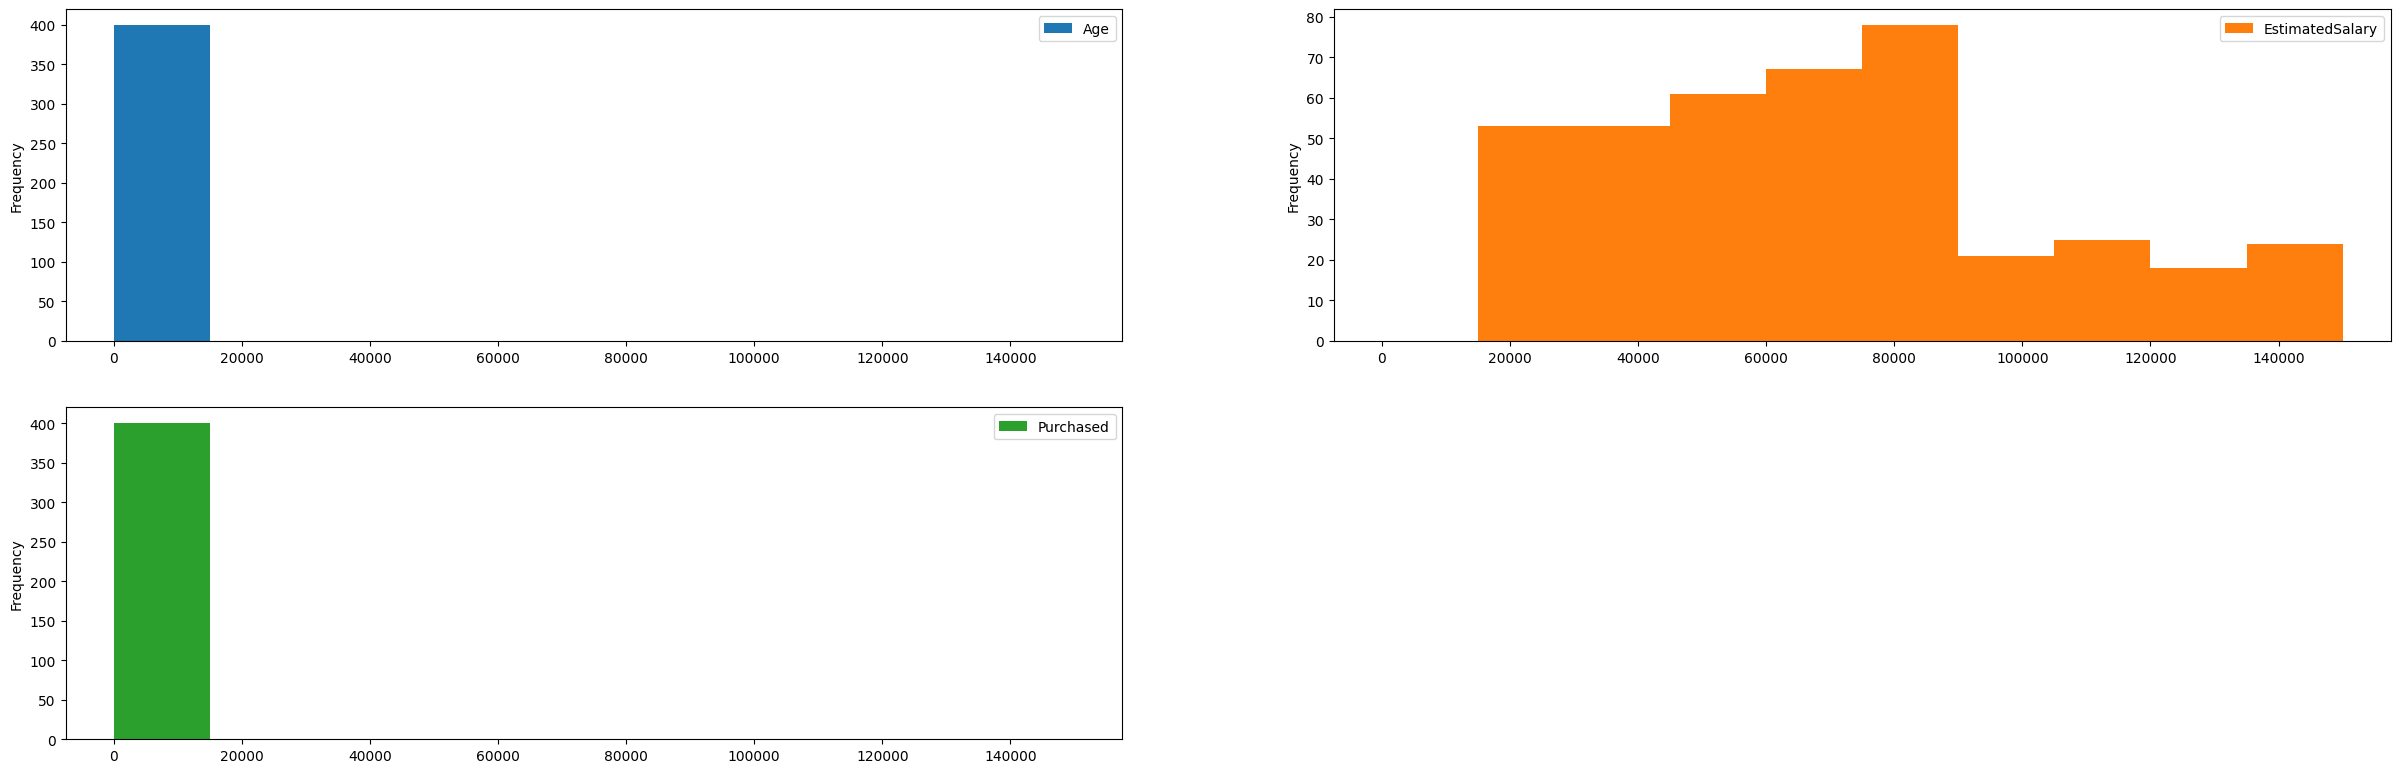

In [47]:
# Plot histograms for all numerical variables to observe the distribution
plt.rcParams['figure.figsize'] = (30, 25)
df.plot(kind='hist', bins=10, subplots=True, layout=(5, 2), sharex=False, sharey=False)
plt.show()


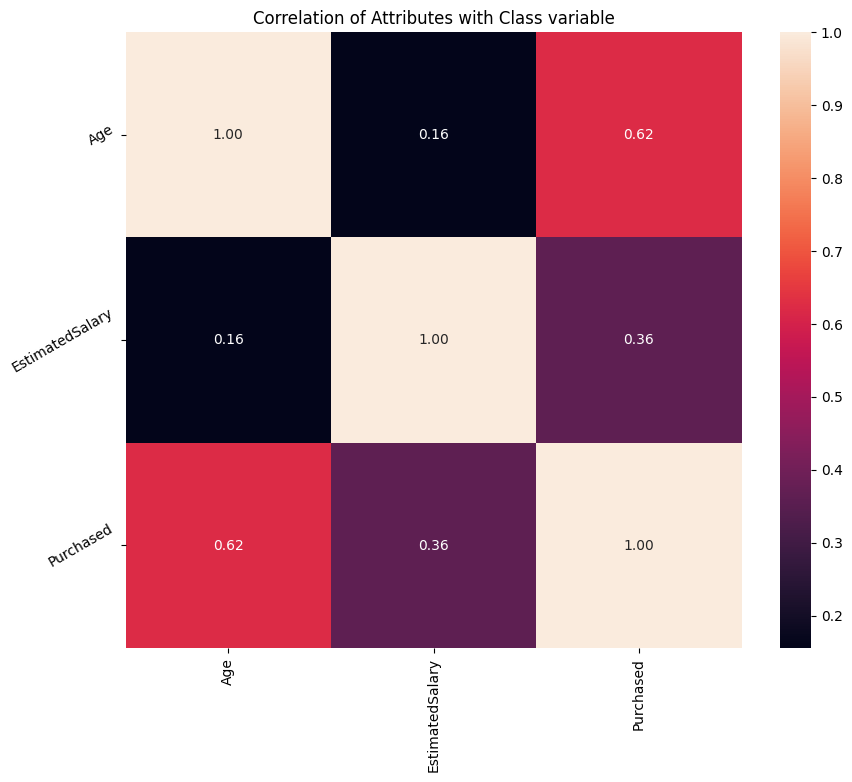

In [48]:
# Calculate the correlation matrix
correlation = df.corr()

# Plot a heatmap to visualize correlations between variables
plt.figure(figsize=(10, 8))
plt.title('Correlation of Attributes with Class variable')
sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')

# Rotate the labels on x and y axes for better readability
plt.xticks(rotation=90)
plt.yticks(rotation=30)
plt.show()


In [49]:
# Separate features (X) and target variable (y)
X = df.drop(['Purchased'], axis=1)
y = df['Purchased']


In [62]:

for col in X.columns:
    if X[col].isnull().mean() > 0:
        col_median = X[col].median()
        X[col].fillna(col_median, inplace=True)


In [63]:
# Standardize the features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert the standardized data back into a DataFrame
X = pd.DataFrame(X, columns=df.drop(['Purchased'], axis=1).columns)


In [64]:
# Split the data into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [65]:
# Import the KNeighborsClassifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the KNN model with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training set
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [66]:
# Make predictions on the test set
y_pred = knn.predict(X_test)
print(y_pred)

# Calculate and print the accuracy of the model
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

# Check accuracy on the training set
y_pred_train = knn.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'.format(accuracy_score(y_train, y_pred_train)))


[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1]
Model accuracy score: 0.9500
Training-set accuracy score: 0.9156


In [69]:
knn.predict_proba(X_test)[:,0]

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.        , 1.        , 0.33333333,
       1.        , 1.        , 1.        , 0.66666667, 1.        ,
       0.        , 0.66666667, 1.        , 0.        , 1.        ,
       1.        , 0.33333333, 1.        , 0.33333333, 1.        ,
       0.33333333, 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.66666667, 0.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       1.        , 0.66666667, 0.        , 1.        , 0.        ,
       0.        , 1.        , 1.        , 0.33333333, 0.33333333,
       0.        , 1.        , 1.        , 0.        , 1.        ,
       1.        , 0.33333333, 1.        , 0.        , 1.        ,
       0.33333333, 1.        , 1.        , 1.        , 0.66666667,
       0.        , 1.        , 1.        , 0.33333333, 1.     

In [72]:
knn.predict_proba(X_test)[:,1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.66666667,
       0.        , 0.        , 0.        , 0.33333333, 0.        ,
       1.        , 0.33333333, 0.        , 1.        , 0.        ,
       0.        , 0.66666667, 0.        , 0.66666667, 0.        ,
       0.66666667, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.33333333, 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.33333333, 1.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 0.66666667, 0.66666667,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.66666667, 0.        , 1.        , 0.        ,
       0.66666667, 0.        , 0.        , 0.        , 0.33333333,
       1.        , 0.        , 0.        , 0.66666667, 0.     

In [73]:
# check class distribution in test set
y_test.value_counts()

,count
Purchased,
0,58
1,22


In [74]:
# check null accuracy score
null_accuracy = (58/(58+22))
print('Null accuracy score: {0:0.4f}'.format(null_accuracy))

Null accuracy score: 0.7250


In [75]:
# Generate a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix and its components
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0, 0])
print('\nTrue Negatives(TN) = ', cm[1, 1])
print('\nFalse Positives(FP) = ', cm[0, 1])
print('\nFalse Negatives(FN) = ', cm[1, 0])


Confusion matrix

 [[55  3]
 [ 1 21]]

True Positives(TP) =  55

True Negatives(TN) =  21

False Positives(FP) =  3

False Negatives(FN) =  1


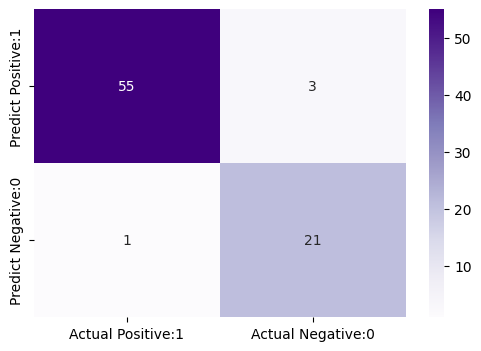

In [76]:
# Create a DataFrame from the confusion matrix for easier plotting
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                         index=['Predict Positive:1', 'Predict Negative:0'])
plt.figure(figsize=(6,4))
# Visualize the confusion matrix using a heatmap
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Purples')
plt.show()
